## Problem Statement
The goal of this project is to predict house prices using property-related features such as
area, number of bedrooms, bathrooms, floors, garage availability, and location.

This is a regression problem where the target variable (Price) is continuous.

## Objective
- Understand the house price dataset
- Perform data preprocessing and feature encoding
- Explore relationships between features and house prices
- Train regression models to predict house prices
- Evaluate model performance using MAE and RMSE


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\House Price Prediction\\House Price Prediction Dataset.csv')

In [7]:
df.shape


(2000, 10)

In [8]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


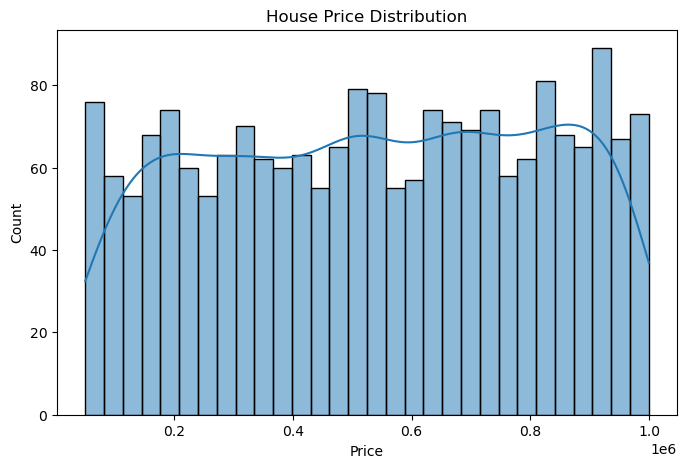

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("House Price Distribution")
plt.show()


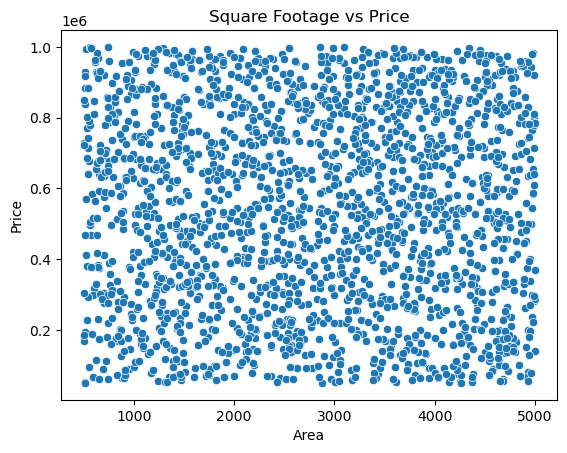

In [28]:
sns.scatterplot(x='Area', y='Price', data=df)
plt.title("Square Footage vs Price")
plt.show()


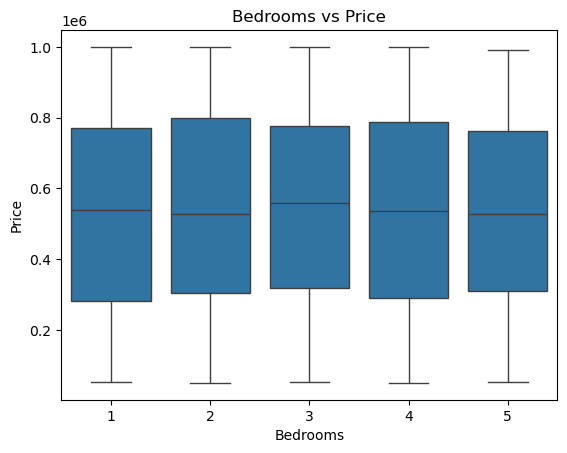

In [29]:
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title("Bedrooms vs Price")
plt.show()


In [22]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [24]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [35]:
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors']]
y = df['Price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [45]:
y_pred_lr = lr.predict(X_test)
y_pred_gbr = gbr.predict(X_test)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)

print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)


Linear Regression MAE: 244399.69772481016
Linear Regression RMSE: 280538.53428802226
Gradient Boosting MAE: 243654.0468795208
Gradient Boosting RMSE: 283212.39990388515


In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()


## Results and Final Insights

- Area and number of bathrooms showed strong correlation with house prices.
- Location also significantly influenced pricing.
- Gradient Boosting Regressor outperformed Linear Regression with lower MAE and RMSE.
- The model predictions closely follow actual prices, indicating good performance.

This project demonstrates how machine learning regression models can be applied to
real estate price prediction using structured data.
